## Kernel Showcase


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp
import numpyro.distributions as dist

from toygp import gp, kernels

In [2]:
plt.rcParams['figure.figsize'] = [10, 4]

## Define Input

In [3]:
num_data = 100

X = dist.Uniform().sample(jax.random.PRNGKey(0), sample_shape=(num_data,))
X = 10 * jnp.sort(X)
X = X[:, None]
X.shape

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


(100, 1)

## Define Parameters

In [4]:
num_gp_samples = 5
length_scale = 1

## RBF (Radial Basis Function)

$k(x, x') = \exp(-\frac{|x - x'|^{2}}{\theta})$

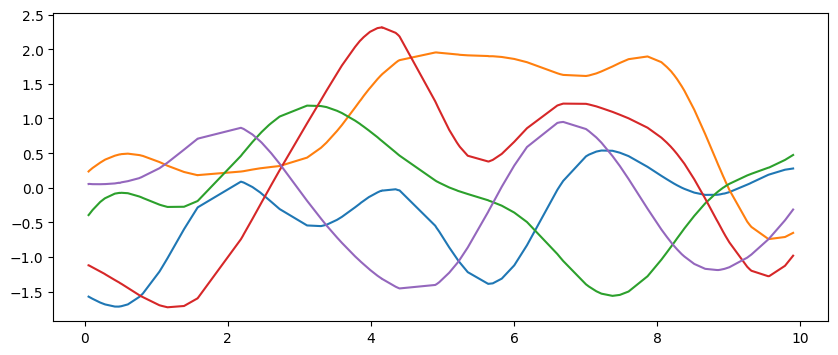

In [5]:
kf = lambda x, y : kernels.rbf(x, y, length_scale)

v = dist.Normal(0, 1).sample(jax.random.PRNGKey(0), sample_shape=(num_gp_samples, num_data))
f = gp.exact(kf, X, v)

plt.plot(X, f.T)
plt.show()

## Exponential

$k(x, x') = \exp(-\frac{|x - x'|}{\theta})$

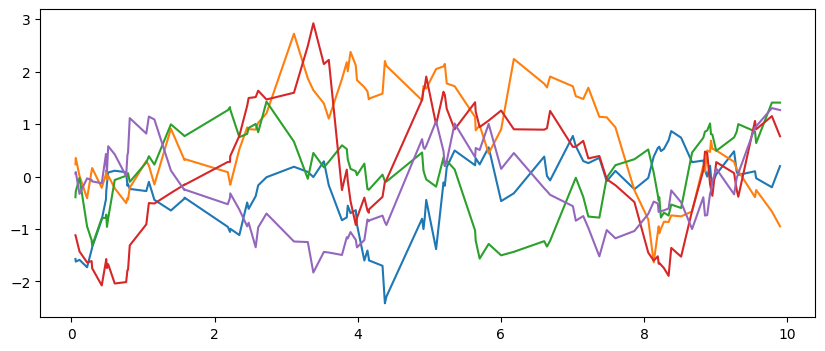

In [6]:
kf = lambda x, y : kernels.exponential(x, y, length_scale)

v = dist.Normal(0, 1).sample(jax.random.PRNGKey(0), sample_shape=(num_gp_samples, num_data))
f = gp.exact(kf, X, v)

plt.plot(X, f.T)
plt.show()

## Matern52

$k(x, x') = (1 + \frac{\sqrt{5} r}{\theta} + \frac{5 r^{2}}{3 \theta ^{2}}) \exp(-\frac{\sqrt{5} r}{\theta}), r = |x - x'|$

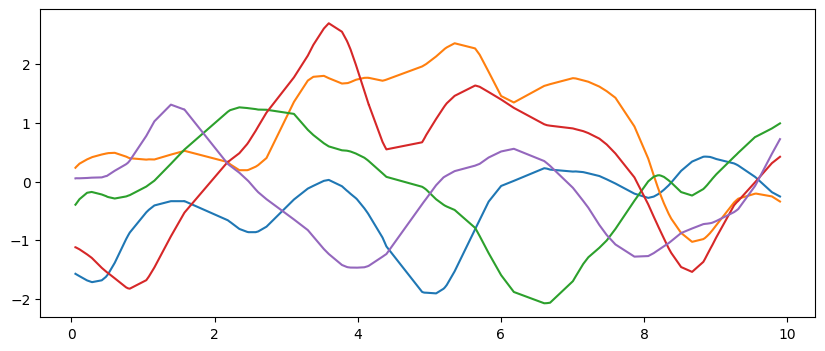

In [7]:
kf = lambda x, y : kernels.matern52(x, y, length_scale)

v = dist.Normal(0, 1).sample(jax.random.PRNGKey(0), sample_shape=(num_gp_samples, num_data))
f = gp.exact(kf, X, v)

plt.plot(X, f.T)
plt.show()

## Matern32

$k(x, x') = (1 + \frac{\sqrt{3} r}{\theta}) \exp(-\frac{\sqrt{3} r}{\theta}), r = |x - x'|$

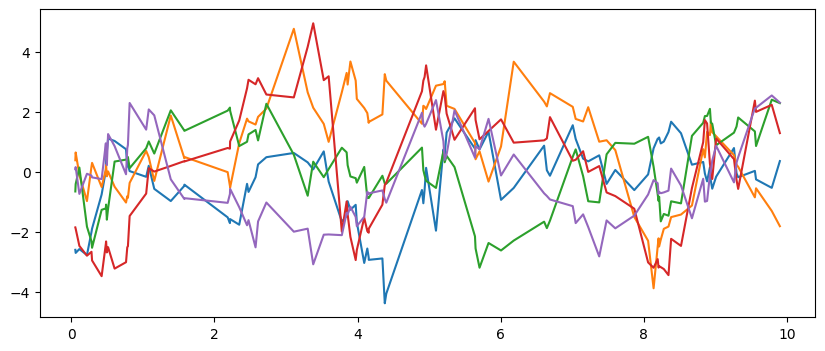

In [8]:
kf = lambda x, y : kernels.matern32(x, y, length_scale)

v = dist.Normal(0, 1).sample(jax.random.PRNGKey(0), sample_shape=(num_gp_samples, num_data))
f = gp.exact(kf, X, v)

plt.plot(X, f.T)
plt.show()

## Cosine

$k(x, x') = \cos(\frac{2 \pi r}{\theta}), r = |x - x'|$

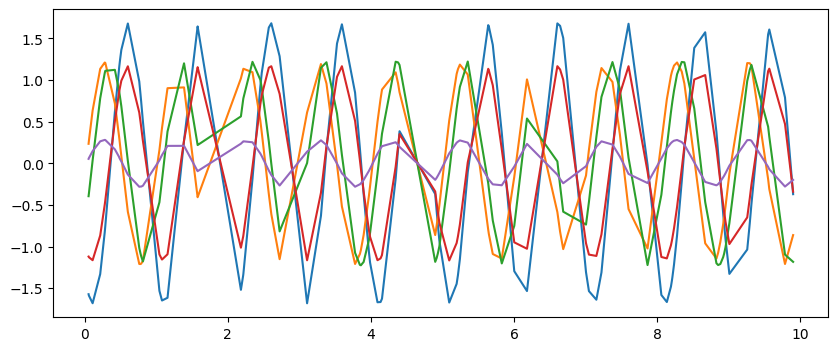

In [9]:
kf = lambda x, y : kernels.cosine(x, y, length_scale)

v = dist.Normal(0, 1).sample(jax.random.PRNGKey(0), sample_shape=(num_gp_samples, num_data))
f = gp.exact(kf, X, v)

plt.plot(X, f.T)
plt.show()

## Exp Cosine

$k(x, x') = \exp(\cos(\frac{2 \pi r}{\theta})), r = |x - x'|$

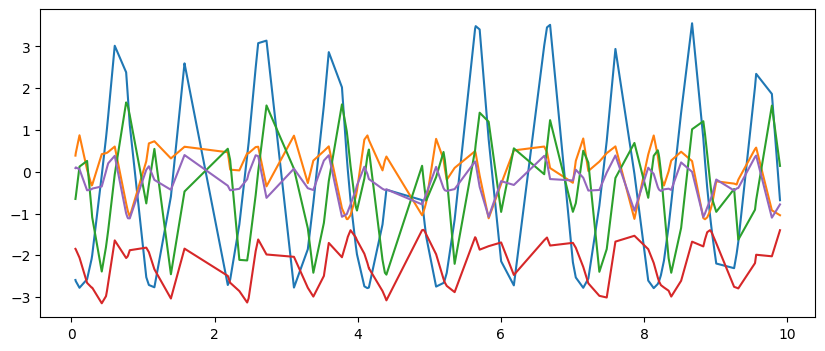

In [10]:
kf = lambda x, y : kernels.exp_cosine(x, y, length_scale)

v = dist.Normal(0, 1).sample(jax.random.PRNGKey(0), sample_shape=(num_gp_samples, num_data))
f = gp.exact(kf, X, v)

plt.plot(X, f.T)
plt.show()

## Linear

$k(x, x') = x^{T} x'$

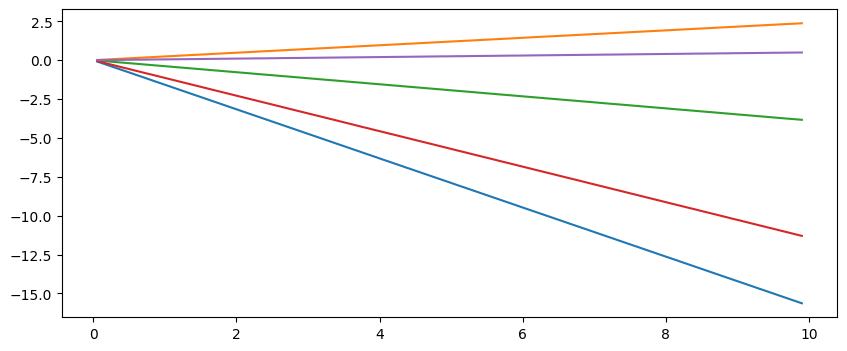

In [11]:
kf = lambda x, y : kernels.linear(x, y)

v = dist.Normal(0, 1).sample(jax.random.PRNGKey(0), sample_shape=(num_gp_samples, num_data))
f = gp.exact(kf, X, v)

plt.plot(X, f.T)
plt.show()

## Constant

$k(x, x') = 1$

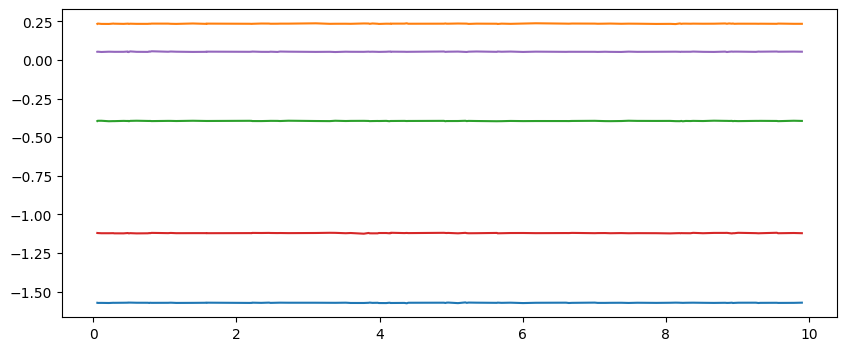

In [14]:
kf = lambda x, y : kernels.constant(x, y)

v = dist.Normal(0, 1).sample(jax.random.PRNGKey(0), sample_shape=(num_gp_samples, num_data))
f = gp.exact(kf, X, v)

plt.plot(X, f.T)
plt.show()

## WGN (White Gaussian Noise)

$k(x, x') = \delta(x, x')$

function $\delta$ returns 1 when $x=x'$, otherwise returns 0.

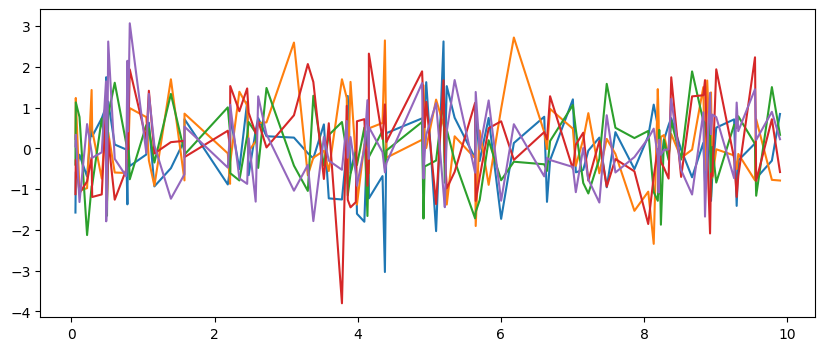

In [13]:
kf = lambda x, y : kernels.wgn(x, y)

v = dist.Normal(0, 1).sample(jax.random.PRNGKey(0), sample_shape=(num_gp_samples, num_data))
f = gp.exact(kf, X, v)

plt.plot(X, f.T)
plt.show()